# What's the Weather Like?

## WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable Trends

* After collecting weather data from 559 random and diverse cities around the world using the OpenWeatherMap API, which was collected on February 1, 2019, the data illustrated maximum temperature (in Fahrenheit), humidity (%), cloudiness (%) and wind speed (in mph) with the corresponding city, and with respect to the geo-coordinate, Latitude. Expectedly, temperatures are higher closer to the Equator (at 0° Latitude) and are much lower in the Northern Hemishpere, at this time of year in February. It is also of worth to note that temperatures peak at around -20° to -30° Latitude, and drop slightly further into the Southern Hemisphere (at -40° Latitude and below), near the South Pole. This data on temperature is the result of seasons and the tilt of the Earth's axis compared to the plane of its revolution around the Sun. Throughout the year the northern and southern hemispheres are alternately turned either toward or away from the sun depending on Earth's position in its orbit. The hemisphere turned toward the sun receives more sunlight and is in summer, while the other hemisphere receives less sun and is in winter.

* There seems to be little to no correlation between humidity and Latitude as well as with cloudiness and Latitude. The scatter plot visualizations display a considerable amount of heterogeneity even at similar Latitudes. Basically, they're all over the map. However, a small grouping of cities exhibited abnormally low humity levels (at 0% humidity) in the Northern Hemisphere at around 60° to 75° Latitude.

* Finally, wind speeds increase in the upper and lower halves on the hemisphere, especially in the north (around 60° to 70° Latitude), and do not go above 25mph within 30° of the Equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API Key
from api_keys import api_key

# Incorporated Citipy to Determine City Based on Latitude & Longitude
from citipy import citipy

# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 99.18,
        "lat": 58.6
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -29.96,
        "pressure": 1014.13,
        "humidity": 49,
        "temp_min": -29.96,
        "temp_max": -29.96,
        "sea_level": 1053.06,
        "grnd_level": 1014.13
    },
    "wind": {
        "speed": 2.73,
        "deg": 222
    },
    "clouds": {
        "all": 24
    },
    "dt": 1549068656,
    "sys": {
        "message": 0.0029,
        "country": "RU",
        "sunrise": 1549070935,
        "sunset": 1549100744
    },
    "id": 1503037,
    "name": "Kodinsk",
    "cod": 200
}


In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [5]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Rikitea
Processing Record 2 | Ushuaia
Processing Record 3 | Yumen
Processing Record 4 | Busselton
Processing Record 5 | Tommot
Processing Record 6 | Albany
Processing Record 7 | Tautira
Processing Record 8 | Geraldton
Processing Record 9 | Saskylakh
Processing Record 10 | Jamestown
City not found. Skipping...
Processing Record 11 | Mar del Plata
Processing Record 12 | Prainha
Processing Record 13 | Hobart
Processing Record 14 | San Miguel
Processing Record 15 | Barcelos
Processing Record 16 | Upernavik
Processing Record 17 | Alice Springs
Processing Record 18 | East London
Processing Record 19 | Shangrao
Processing Record 20 | Victoria
City not found. Skipping...
Processing Record 21 | Thompson
Processing Record 22 | Arcata
Processing Record 23 | Ramnagar
Processing Record 24 | Baykit
Processing Record 25 | Port Alfred
Processing Record 26 | Wendo
Processing Record 27 | Bethel
City not found. Skipping...
Pro

Processing Record 227 | Te Anau
Processing Record 228 | Camacha
Processing Record 229 | Volzhskiy
City not found. Skipping...
Processing Record 230 | Tres Arroyos
Processing Record 231 | Kodiak
Processing Record 232 | Makubetsu
Processing Record 233 | Pokhara
Processing Record 234 | Camacupa
Processing Record 235 | Yishui
Processing Record 236 | Kahului
Processing Record 237 | Carnarvon
Processing Record 238 | Samarai
Processing Record 239 | San Quintin
Processing Record 240 | Plettenberg Bay
Processing Record 241 | Dabola
Processing Record 242 | Egvekinot
Processing Record 243 | Wewak
Processing Record 244 | Tasiilaq
City not found. Skipping...
Processing Record 245 | Bandarbeyla
City not found. Skipping...
Processing Record 246 | Henties Bay
Processing Record 247 | Dubbo
Processing Record 248 | Rabo de Peixe
Processing Record 249 | Naze
Processing Record 250 | Dromolaxia
Processing Record 251 | Saquarema
City not found. Skipping...
Processing Record 252 | Klaksvik
Processing Record 2

Processing Record 456 | Ulaangom
Processing Record 457 | Aurora
Processing Record 458 | Gazli
Processing Record 459 | Byron Bay
Processing Record 460 | Vila
Processing Record 461 | Fukue
Processing Record 462 | Ulaanbaatar
Processing Record 463 | Zhob
Processing Record 464 | Allanridge
Processing Record 465 | Maningrida
Processing Record 466 | Taloqan
Processing Record 467 | Prince Rupert
Processing Record 468 | Mount Isa
Processing Record 469 | Bowen
Processing Record 470 | Qaqortoq
Processing Record 471 | Anaconda
Processing Record 472 | Kapit
Processing Record 473 | Bismarck
Processing Record 474 | Innisfail
Processing Record 475 | Bulawayo
Processing Record 476 | Aiken
Processing Record 477 | Tuatapere
Processing Record 478 | Costinesti
Processing Record 479 | Kargopol
Processing Record 480 | Bontang
Processing Record 481 | Lebane
Processing Record 482 | Santa Cruz
Processing Record 483 | Vagur
Processing Record 484 | Vale da Amoreira
Processing Record 485 | Myaundzha
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               559
Country            559
Date               559
Latitude           559
Longitude          559
Max Temperature    559
Humidity           559
Cloudiness         559
Wind Speed         559
dtype: int64

In [7]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,1549068659,-23.12,-134.97,81.47,99,48,8.10
1,Ushuaia,AR,1549066500,-54.81,-68.31,50.00,53,90,25.28
2,Yumen,CN,1549068659,40.29,97.04,12.12,77,36,14.14
3,Busselton,AU,1549068659,-33.64,115.35,65.54,100,32,16.26
4,Tommot,RU,1549068660,58.97,126.27,-36.93,68,32,2.51


In [8]:
# Export & Save Data Into a .csv.
weather_data.to_csv("./Data/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

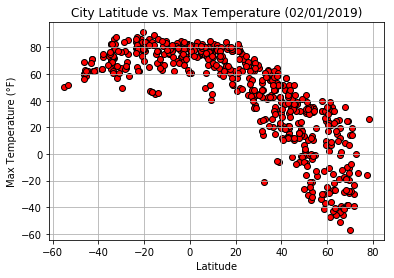

In [9]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (02/01/2019)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

#### Latitude vs. Humidity Plot

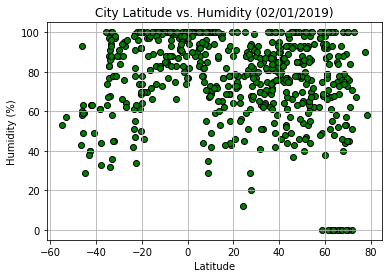

In [10]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (02/01/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

#### Latitude vs. Cloudiness Plot

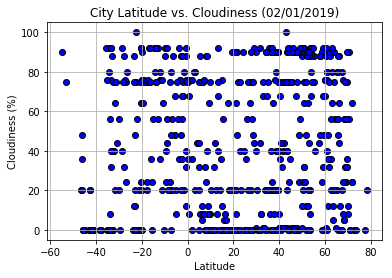

In [11]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (02/01/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

#### Latitude vs. Wind Speed Plot

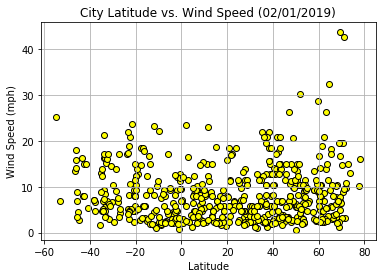

In [12]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (02/01/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()